# TP 1 Análisis de Series Temporales
Lijtmaer - Gaddi - Brusasca - Duran - Palavecino

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf
import matplotlib
import pmdarima
import statsmodels.tsa.stattools as tsa
import statsmodels.api as sm

In [3]:
ticker_nvda = ['NVDA']
ticker_amd = ['AMD']
ticker_intel = ['INTC']

nvda_data = yf.download(ticker_nvda, start='2023-01-01', end='2025-01-04')[['Close']]
amd_data = yf.download(ticker_amd, start='2023-01-01', end='2025-01-04')[['Close']]
intel_data = yf.download(ticker_intel, start='2023-01-01', end='2025-01-04')[['Close']]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
print(nvda_data.shape)
print(amd_data.shape)
print(intel_data.shape)

(504, 1)
(504, 1)
(504, 1)


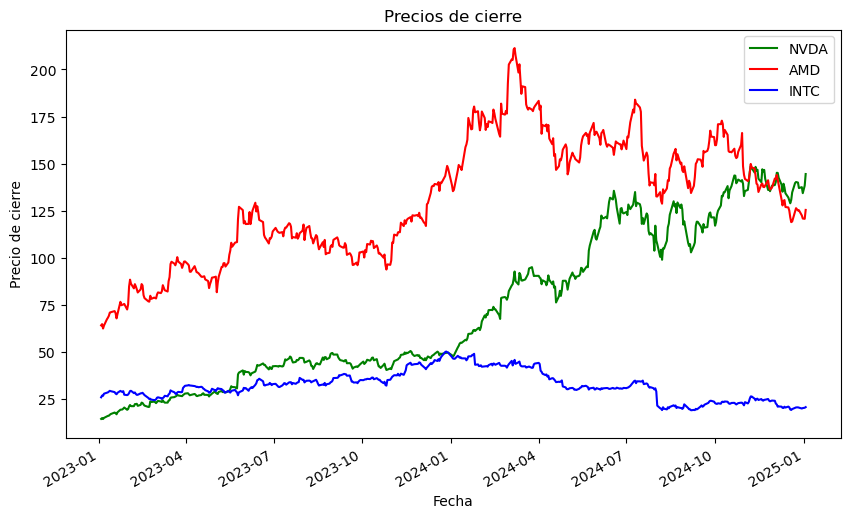

In [5]:
# Gráfico de precios de cierre

nvda_data[('Close', 'NVDA')].plot(title='NVDA Closing Prices', figsize=(10, 6), color = 'green')
amd_data[('Close', 'AMD')].plot(title='AMD Closing Prices', figsize=(10, 6), color = 'red')
intel_data[('Close', 'INTC')].plot(title='INTC Closing Prices', figsize=(10, 6), color = 'blue')

plt.title('Precios de cierre')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.legend(['NVDA', 'AMD', 'INTC'])
plt.show()

A simple vista, NVDA y AMD no aparentan ser estacionarias, Intel por otro lado aparenta cierta estabilidad en el tiempo

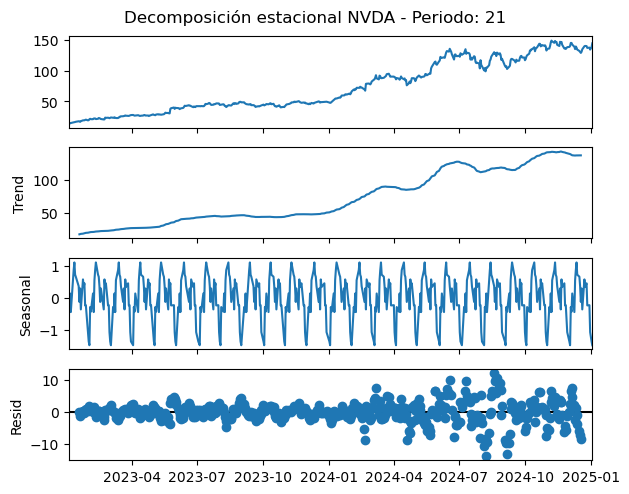

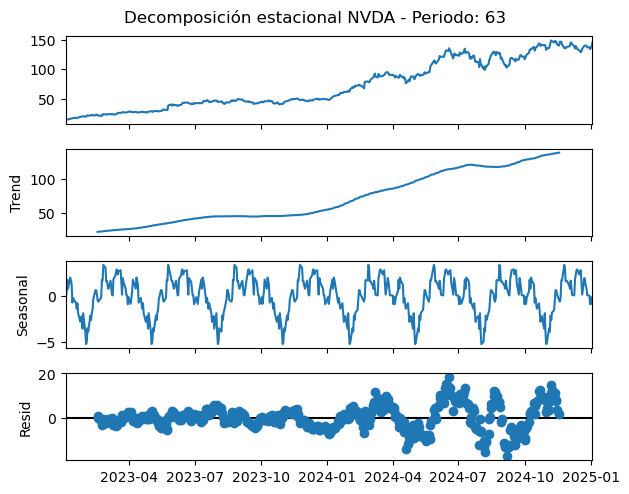

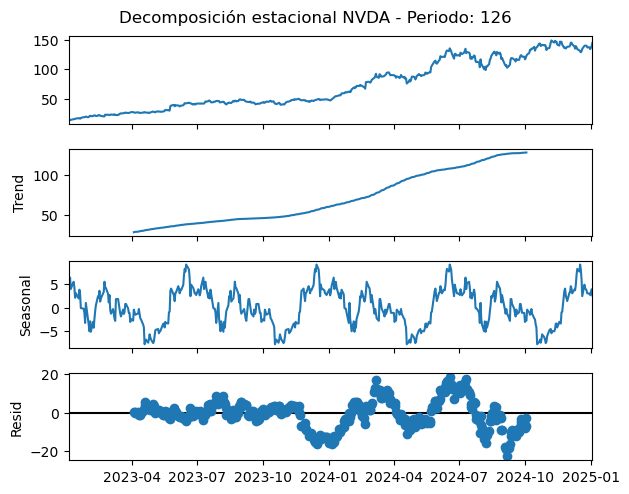

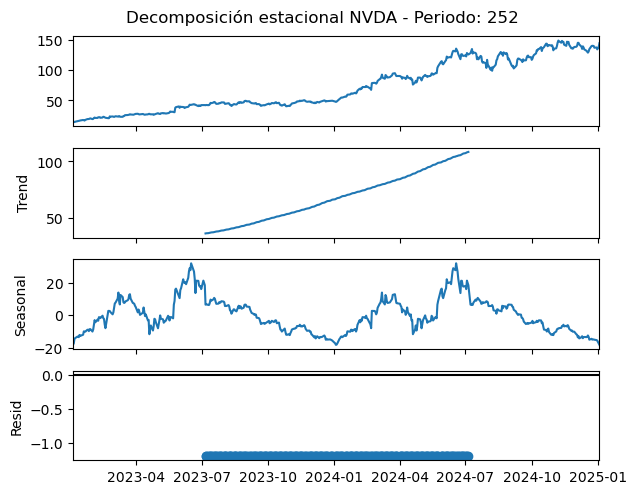

In [6]:
# Descomposicion estacional NVDA
for p in [21, 63, 126, 252]:
    decomposicion_nvda = seasonal_decompose(nvda_data, model='additive', period=p)
    ax = decomposicion_nvda.plot()
    ax.suptitle(f'Decomposición estacional NVDA - Periodo: {p}', y=1.02)
    plt.show()

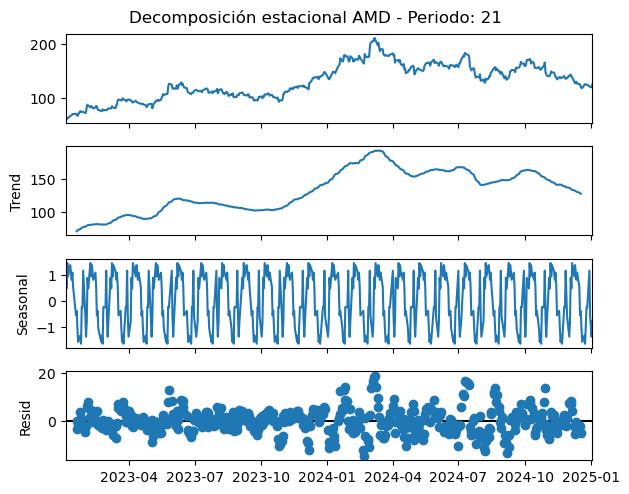

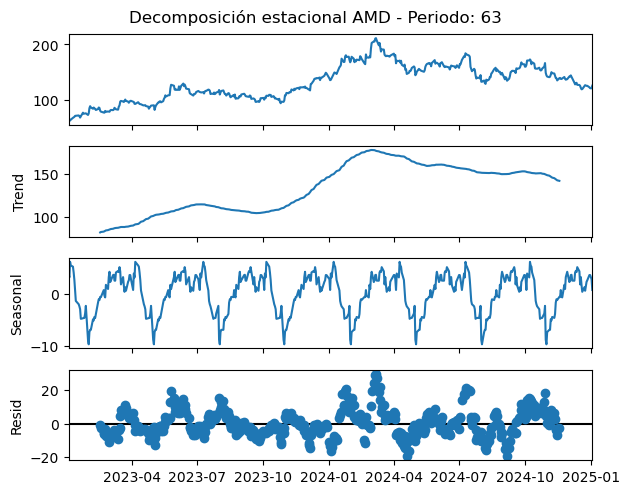

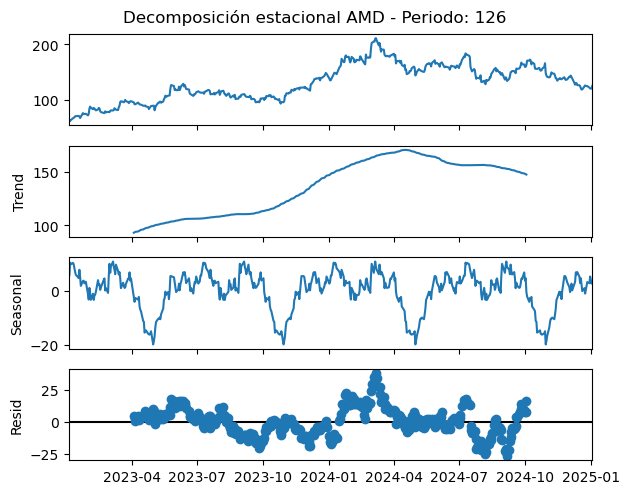

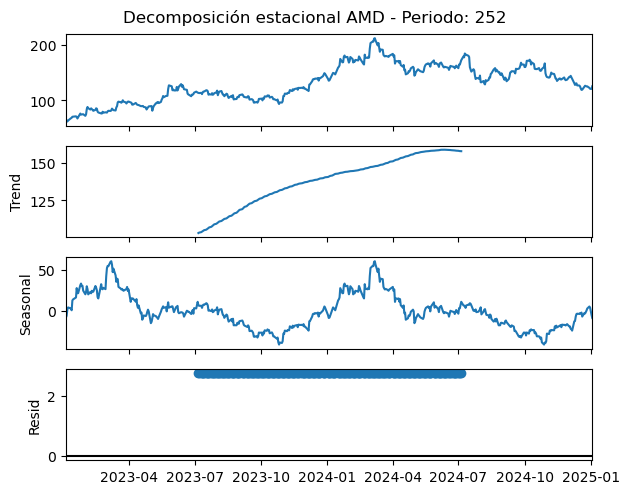

In [7]:
# Descomposicion estacional AMD
for p in [21, 63, 126, 252]:
    decomposicion_amd = seasonal_decompose(amd_data, model='additive', period=p)
    ax = decomposicion_amd.plot()
    ax.suptitle(f'Decomposición estacional AMD - Periodo: {p}', y=1.02)
    plt.show()

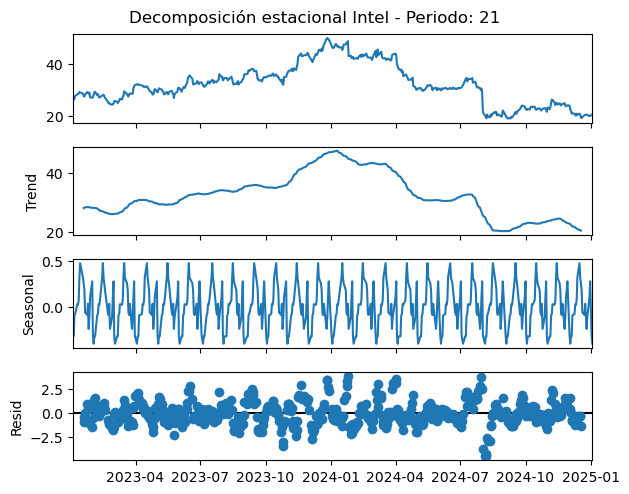

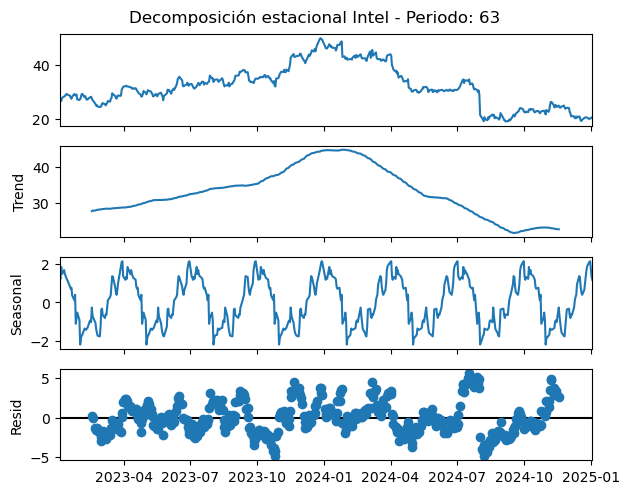

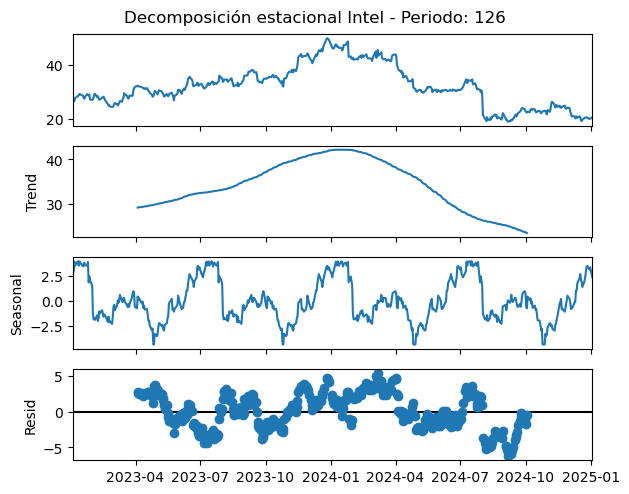

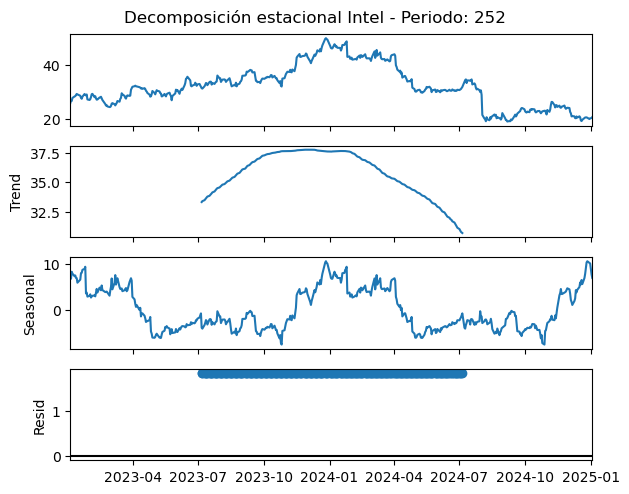

In [8]:
# Descomposicion estacional Intel
for p in [21, 63, 126, 252]:
    decomposicion_intel = seasonal_decompose(intel_data, model='additive', period=p)
    ax = decomposicion_intel.plot()
    ax.suptitle(f'Decomposición estacional Intel - Periodo: {p}', y=1.02)
    plt.show()

### FAS, FAC, FACP

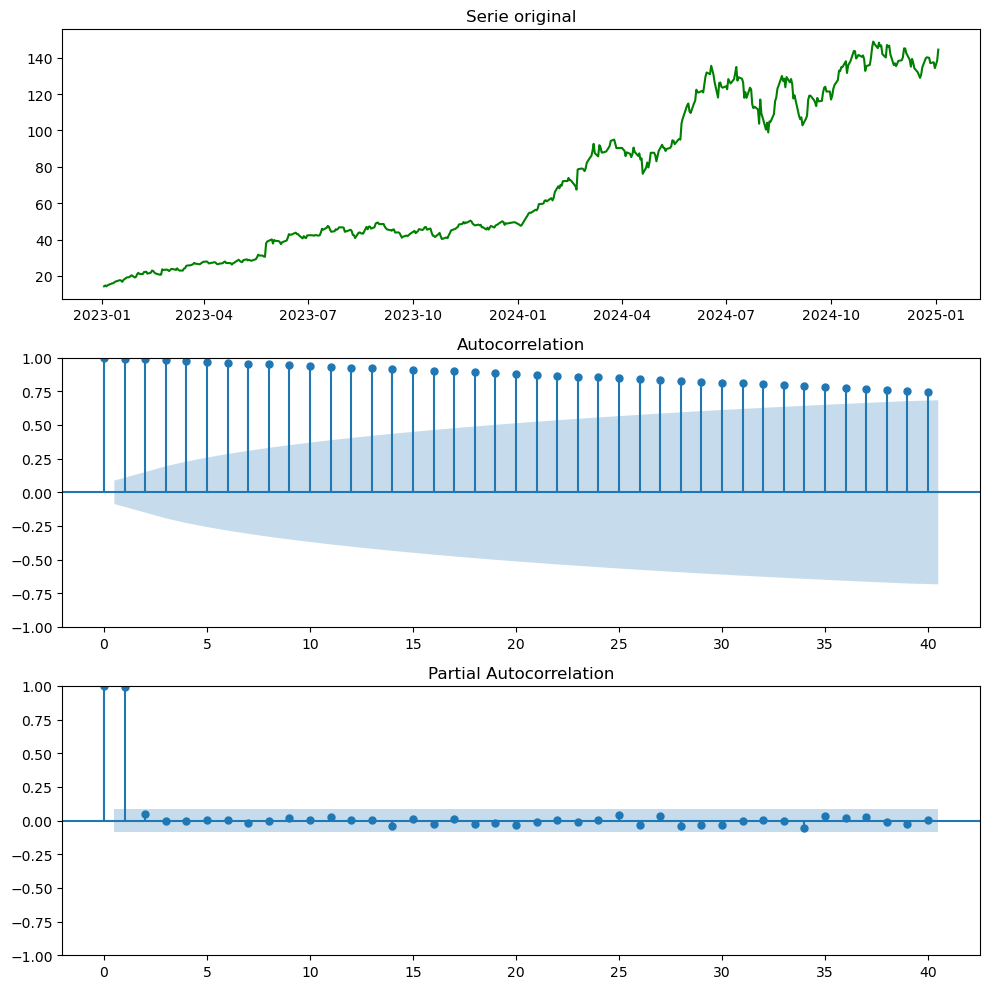

In [9]:
fig, axes = plt.subplots(3,1, figsize=(10,10))
axes[0].plot(nvda_data, color='green')
axes[0].set_title("Serie original")
plot_acf(nvda_data, ax=axes[1], lags=40)
plot_pacf(nvda_data, ax=axes[2], lags=40, method='ywm')
plt.tight_layout()
plt.show()

Analizando los graficos de FAC y FACP se infiere que la serie de NVDA es no estacionaria

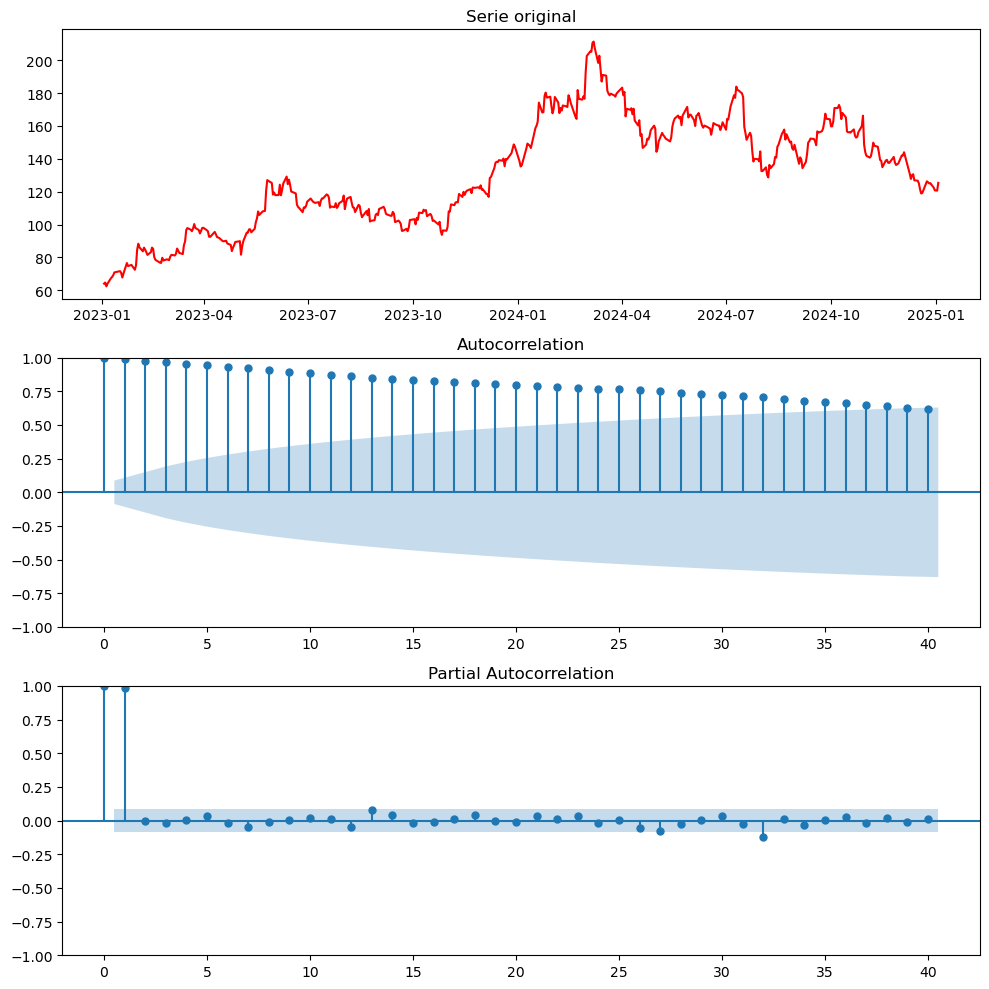

In [10]:
fig, axes = plt.subplots(3,1, figsize=(10,10))
axes[0].plot(amd_data, color='red')
axes[0].set_title("Serie original")
plot_acf(amd_data, ax=axes[1], lags=40)
plot_pacf(amd_data, ax=axes[2], lags=40, method='ywm')
plt.tight_layout()
plt.show()

Analizando los graficos de FAC y FACP se infiere que la serie de AMD es no estacionaria

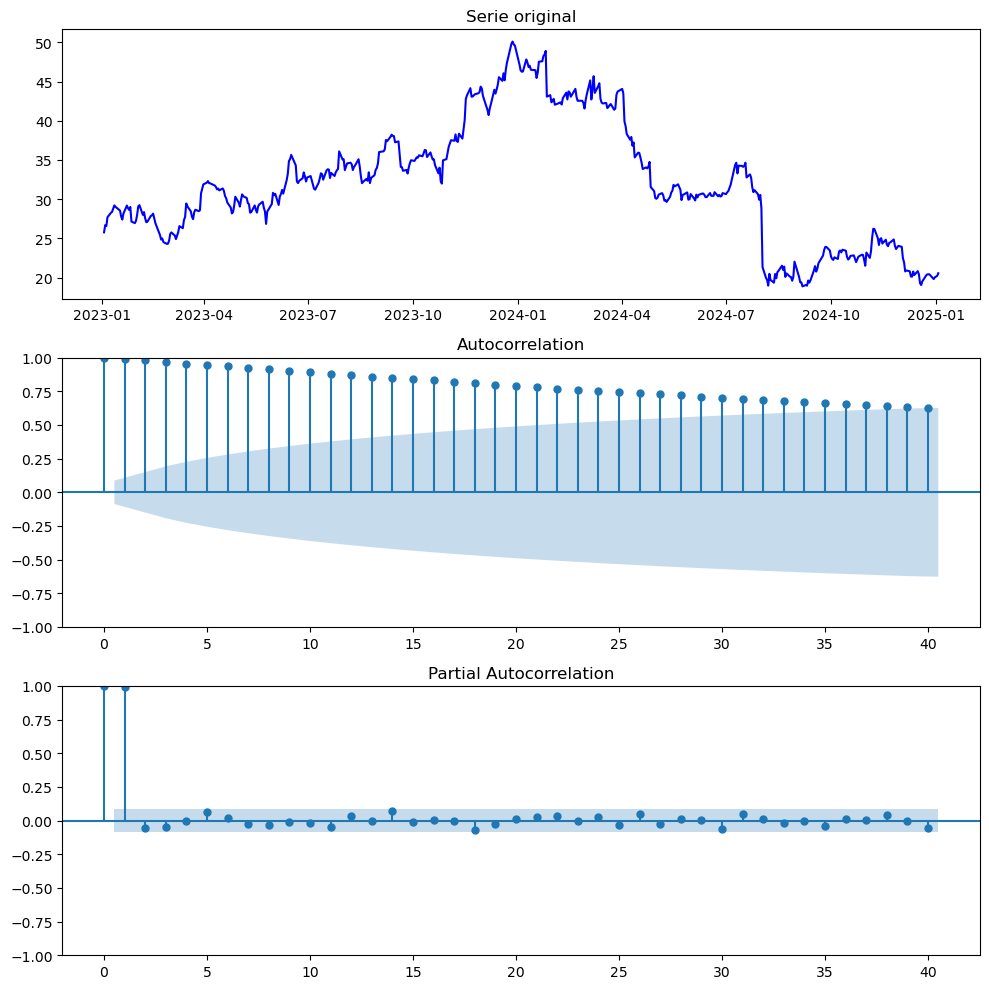

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(10,10))
axes[0].plot(intel_data, color='blue')
axes[0].set_title("Serie original")
plot_acf(intel_data, ax=axes[1], lags=40)
plot_pacf(intel_data, ax=axes[2], lags=40, method='ywm')
plt.tight_layout()
plt.show()

Analizando los graficos de FAC y FACP se infiere que la serie de Intel es no estacionaria

## Pruebas de raiz unitaria

NVDA

In [ ]:
# Test dickey-fuller y dickey-fuller avanzado NVDA
adfull_nvda = tsa.adfuller(nvda_data)
adfull_nvda_avanzado = tsa.adfuller(nvda_data, regression='ct')
print(adfull_nvda)
print(adfull_nvda_avanzado)

(-0.09163259905382122, 0.9502656077025651, 14, 489, {'1%': -3.4437936797256317, '5%': -2.867468682890213, '10%': -2.5699277594606915}, 2313.1608412859428)
(-2.33671505611278, 0.41375798742618086, 14, 489, {'1%': -3.9774035296590564, '5%': -3.4195064995519675, '10%': -3.1323541312426393}, 2309.3325200730233)


AMD

In [13]:
# Test dickey-fuller y dickey-fuller avanzado AMD
adfull_amd = tsa.adfuller(amd_data)
adfull_amd_avanzado = tsa.adfuller(amd_data, regression='ct')
print(adfull_amd)
print(adfull_amd_avanzado)

(-2.1332476054791423, 0.23135737524552846, 0, 503, {'1%': -3.4434175660489905, '5%': -2.8673031724657454, '10%': -2.5698395516760275}, 2738.3941438905968)
(-1.6540630705787764, 0.7705531168358506, 0, 503, {'1%': -3.976881624526169, '5%': -3.419254500103788, '10%': -3.1322060469905884}, 2740.33531545177)


Intel  

In [14]:
# Test dickey-fuller y dickey-fuller avanzado Intel
adfull_intel = tsa.adfuller(intel_data)
adfull_intel_avanzado = tsa.adfuller(intel_data, regression='ct')
print(adfull_intel)
print(adfull_intel_avanzado)

(-1.1297359608918187, 0.7030690756279044, 1, 502, {'1%': -3.4434437319767452, '5%': -2.8673146875484368, '10%': -2.569845688481135}, 1285.1788048757298)
(-1.518097689218095, 0.8228564384677376, 1, 502, {'1%': -3.9769179319416987, '5%': -3.419272031977485, '10%': -3.1322163496677566}, 1284.099732983248)


No se rechaza la hipótesis nula de existencia de raiz unitaria en ninguna de las tres series